In [1]:
import random
import torch

seed = 42

torch.manual_seed(seed)
random.seed(seed)

In [1]:
%matplotlib inline

In [2]:
YAML_CONFIG = 'pipeline.yaml'   #config file is here
SMALL_YOLO = "small_yolo" #two models small and nano
NANO_YOLO = "nano_yolo"

In [3]:
#import config loader 
from Pipeline import get_yaml_config


Starting: load
loading to .\dataset\train.zip
loading to .\dataset\val.zip
End in 55.60 sec
Starting: unzip
['.\\dataset\\train.zip', '.\\dataset\\val.zip']
End in 8.35 sec
Starting: convert2yolo
will be deleted from .\dataset/VisDrone2019-DET-train 338 files
will be deleted from .\dataset/VisDrone2019-DET-val 33 files
End in 13.89 sec


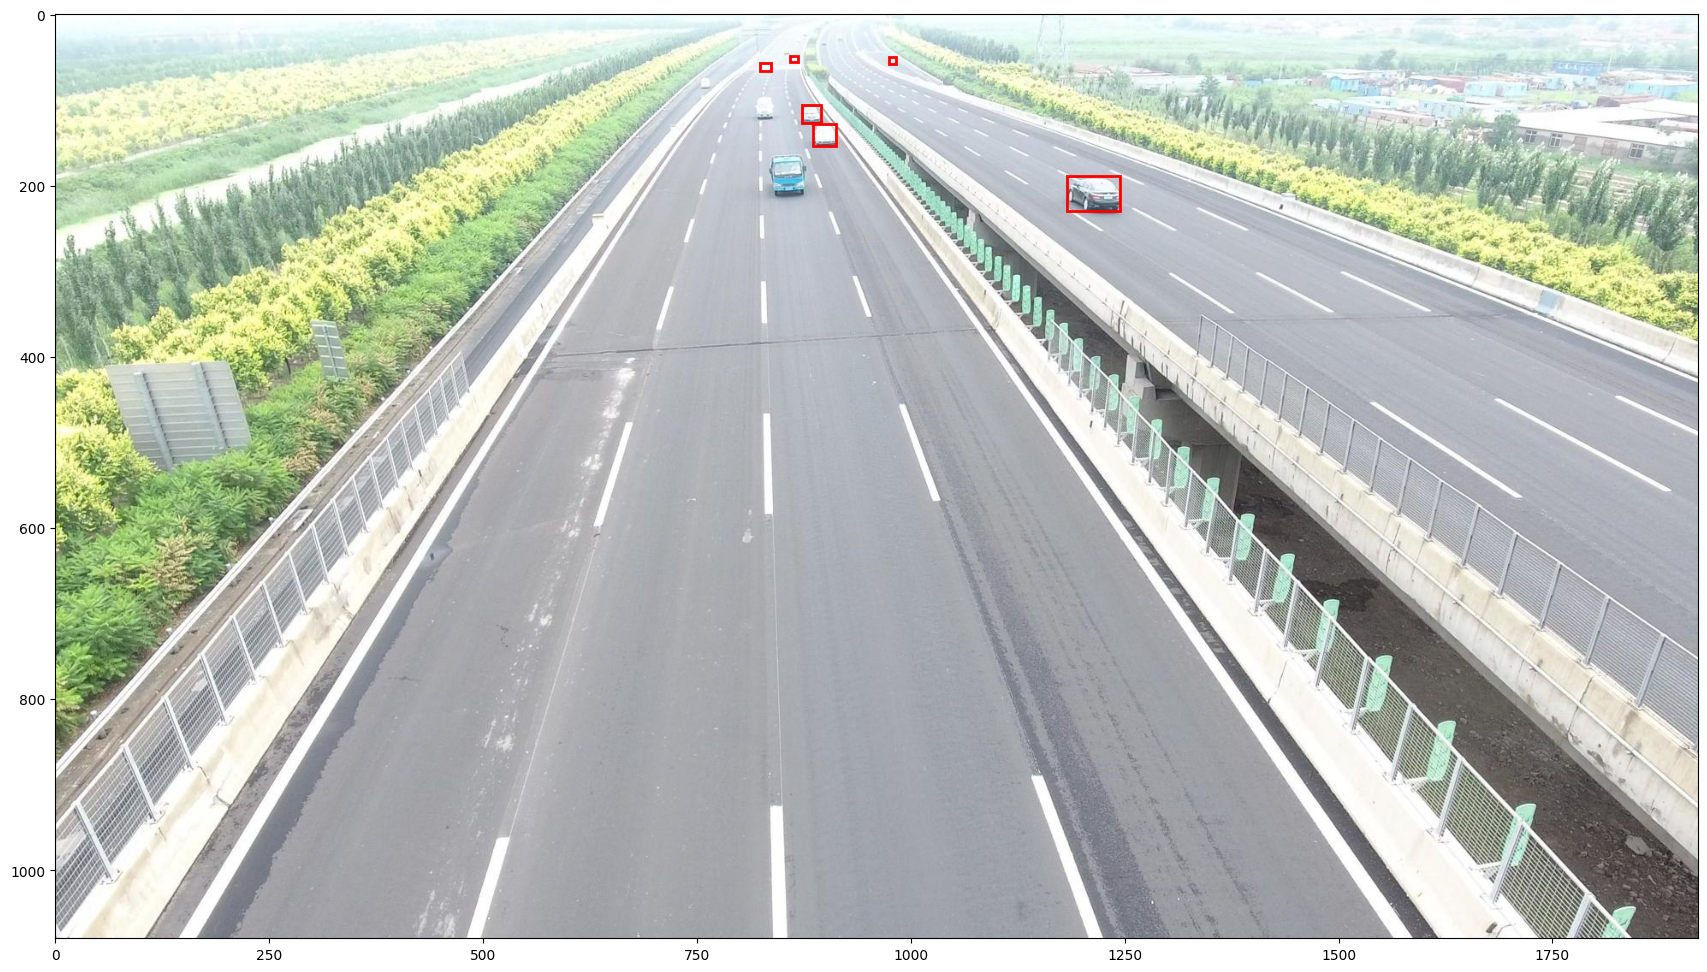

In [ ]:
from Pipeline import Dataset

#prepare dataset for trainig (remove unused labels and files)
prepare_cfg = get_yaml_config(YAML_CONFIG, 'preparing')


data = Dataset(**prepare_cfg)
data()
data.show_random_image()

In [ ]:
from Pipeline import Trainer

train_cfg = get_yaml_config(YAML_CONFIG, 'training')

#if models exists we resume training or pass force_retrain True
trainer = Trainer(train_cfg['path'], SMALL_YOLO, train_cfg['yolo'])

#we can update trainig parameter during train call
trainer.train(epochs=300)

Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
engine\trainer: task=detect, mode=train, model=projects\small_yolo\train\weights\last.pt, data=train.yaml, epochs=300, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=1, cache=disk, device=None, workers=8, project=.\projects\small_yolo, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=projects\small_yolo\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-train\labels.cache... 6133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6133/6133 [00:00<?, ?it/s]

train: WARNING  D:\projects\visdrone\dataset\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed


train: 38.0GB disk space required, with 50% safety margin but only 25.3/265.6GB free, not caching images to disk 
val: Fast image access  (ping: 0.20.0 ms, read: 11.54.5 MB/s, size: 169.1 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 515/515 [00:00<00:00, 8518.15it/s]


Plotting labels to projects\small_yolo\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training projects\small_yolo\train\weights\last.pt from epoch 171 to 300 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to projects\small_yolo\train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      8.34G     0.8916     0.5466     0.8659         57        640: 100%|██████████| 384/384 [01:08<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        515      14064      0.843      0.715      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      7.61G     0.9133     0.5588     0.8689        159        640: 100%|██████████| 384/384 [01:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]

                   all        515      14064      0.842      0.715      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      7.13G     0.9173     0.5608     0.8716         99        640: 100%|██████████| 384/384 [01:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]


                   all        515      14064      0.844      0.714      0.794      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      6.35G     0.9162     0.5609     0.8713        142        640: 100%|██████████| 384/384 [01:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.17it/s]

                   all        515      14064      0.845      0.714      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      8.98G     0.9212     0.5604     0.8714        136        640: 100%|██████████| 384/384 [01:28<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.61it/s]

                   all        515      14064      0.842      0.715      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      6.74G     0.9227     0.5609     0.8721        229        640: 100%|██████████| 384/384 [01:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]

                   all        515      14064      0.843      0.715      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      7.74G     0.9222     0.5593      0.871        234        640: 100%|██████████| 384/384 [01:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.23it/s]

                   all        515      14064      0.843      0.715      0.795      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      7.76G     0.9156     0.5583     0.8707        260        640: 100%|██████████| 384/384 [01:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]

                   all        515      14064      0.843      0.715      0.795      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      6.48G     0.9258     0.5648     0.8726        142        640: 100%|██████████| 384/384 [01:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]

                   all        515      14064      0.843      0.715      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      7.45G      0.923     0.5637     0.8725        266        640: 100%|██████████| 384/384 [01:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]

                   all        515      14064      0.844      0.714      0.795      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300       7.1G     0.9227     0.5632     0.8736        129        640: 100%|██████████| 384/384 [01:01<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]

                   all        515      14064      0.843      0.714      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      8.55G     0.9237      0.559     0.8717        249        640: 100%|██████████| 384/384 [01:08<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.20it/s]

                   all        515      14064      0.844      0.714      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      6.22G     0.9271     0.5646     0.8716        265        640: 100%|██████████| 384/384 [01:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.25it/s]

                   all        515      14064      0.844      0.713      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      5.76G     0.9281     0.5659      0.873         97        640: 100%|██████████| 384/384 [01:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.27it/s]

                   all        515      14064      0.844      0.713      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      6.85G     0.9236     0.5616     0.8709        151        640: 100%|██████████| 384/384 [01:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]

                   all        515      14064      0.845      0.713      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      6.24G      0.917     0.5592     0.8709        142        640: 100%|██████████| 384/384 [01:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]

                   all        515      14064      0.845      0.714      0.794      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      7.06G     0.9239     0.5632      0.873        144        640: 100%|██████████| 384/384 [01:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.28it/s]

                   all        515      14064      0.845      0.713      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      6.69G     0.9193     0.5593     0.8715        214        640: 100%|██████████| 384/384 [01:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.30it/s]

                   all        515      14064      0.845      0.713      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300       6.3G     0.9182     0.5598     0.8713        219        640: 100%|██████████| 384/384 [01:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.29it/s]

                   all        515      14064      0.845      0.713      0.794      0.548
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 179, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



19 epochs completed in 0.358 hours.
Optimizer stripped from projects\small_yolo\train\weights\last.pt, 19.2MB
Optimizer stripped from projects\small_yolo\train\weights\best.pt, 19.2MB

Validating projects\small_yolo\train\weights\best.pt...
Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]


                   all        515      14064      0.842      0.715      0.794      0.548
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to projects\small_yolo\train


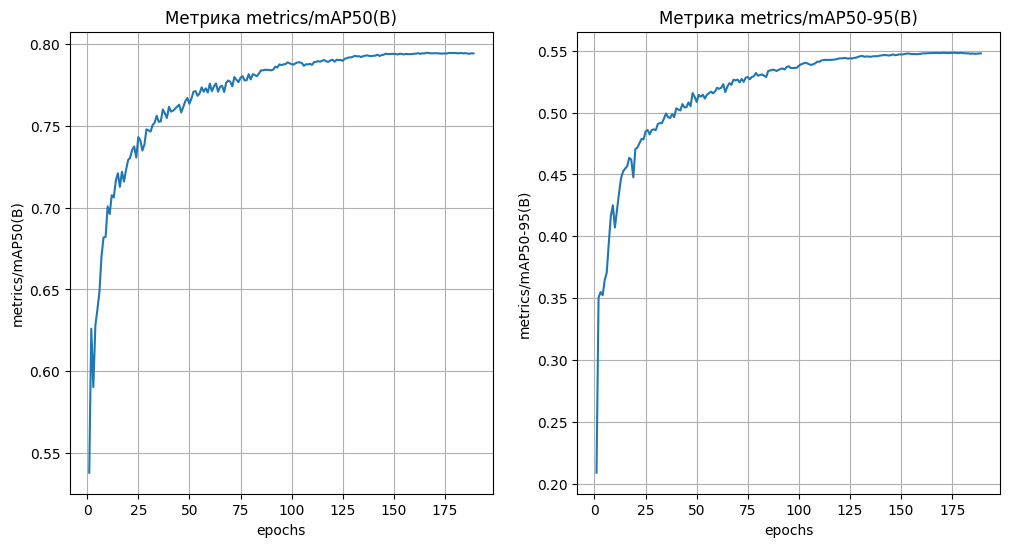

In [ ]:
trainer.plot_metrics(metrics=['metrics/mAP50(B)', 'metrics/mAP50-95(B)'])


In [ ]:
from Pipeline import Trainer

train_cfg = get_yaml_config(YAML_CONFIG, 'training')

#if models exists we resume training or pass force_retrain True
trainer = Trainer(train_cfg['path'], NANO_YOLO, train_cfg['yolo'])
trainer.train(epochs=300, model='yolo11n.pt')


Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
engine\trainer: task=detect, mode=train, model=projects\nano_yolo\train\weights\last.pt, data=train.yaml, epochs=300, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=.\projects\nano_yolo, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=projects\nano_yolo\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-train\labels.cache... 6133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6133/6133 [00:00<?, ?it/s]

train: WARNING  D:\projects\visdrone\dataset\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed


val: Fast image access  (ping: 0.10.0 ms, read: 228.1134.8 MB/s, size: 146.5 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]


Plotting labels to projects\nano_yolo\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training projects\nano_yolo\train\weights\last.pt from epoch 189 to 300 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to projects\nano_yolo\train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      6.71G      1.054     0.6827     0.9001         57        640: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]


                   all        515      14064        0.8      0.671       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300       6.1G       1.07     0.6903     0.9014        159        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]

                   all        515      14064        0.8       0.67       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      5.57G      1.073     0.6937     0.9046         99        640: 100%|██████████| 384/384 [00:44<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.75it/s]

                   all        515      14064      0.798      0.673       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.82G      1.068     0.6904     0.9023        142        640: 100%|██████████| 384/384 [00:44<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.80it/s]


                   all        515      14064      0.799      0.671       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      7.42G      1.074     0.6906     0.9028        136        640: 100%|██████████| 384/384 [00:45<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.69it/s]

                   all        515      14064      0.799      0.673       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      5.07G      1.071     0.6875     0.9032        229        640: 100%|██████████| 384/384 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.72it/s]


                   all        515      14064      0.798      0.672      0.749      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      6.08G      1.071     0.6868     0.9015        234        640: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]

                   all        515      14064      0.801       0.67      0.749      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      6.19G      1.061     0.6842     0.9007        260        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.69it/s]

                   all        515      14064      0.801      0.669       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300       4.8G      1.071     0.6889     0.9024        142        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.74it/s]


                   all        515      14064      0.801      0.669       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      5.86G      1.066      0.688     0.9023        266        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.73it/s]


                   all        515      14064      0.802       0.67       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      5.42G      1.065     0.6882     0.9028        129        640: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.65it/s]

                   all        515      14064      0.802      0.669       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      6.89G      1.065      0.683     0.9004        249        640: 100%|██████████| 384/384 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.75it/s]

                   all        515      14064      0.802      0.669       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      4.92G      1.066     0.6882     0.9002        265        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.70it/s]

                   all        515      14064      0.803      0.669       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      4.28G      1.068     0.6912     0.9018         97        640: 100%|██████████| 384/384 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.78it/s]


                   all        515      14064      0.803      0.669       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      5.17G      1.061     0.6846     0.8992        151        640: 100%|██████████| 384/384 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.79it/s]


                   all        515      14064      0.803      0.669       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.58G      1.053     0.6805     0.8988        142        640: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.69it/s]


                   all        515      14064      0.803       0.67      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300       5.6G      1.061     0.6846     0.9002        144        640: 100%|██████████| 384/384 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]


                   all        515      14064      0.803       0.67       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      5.04G      1.056     0.6792     0.9001        214        640: 100%|██████████| 384/384 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.76it/s]


                   all        515      14064      0.803       0.67      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.66G      1.052     0.6793     0.8978        219        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]


                   all        515      14064      0.803       0.67      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.58G      1.053     0.6816     0.8994        232        640: 100%|██████████| 384/384 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.78it/s]


                   all        515      14064      0.803       0.67      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.25G      1.058     0.6823        0.9        130        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.68it/s]


                   all        515      14064      0.804       0.67      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      5.12G      1.063     0.6817      0.899         93        640: 100%|██████████| 384/384 [00:45<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.78it/s]


                   all        515      14064      0.802      0.671      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      4.91G      1.051       0.68     0.8999        198        640: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.64it/s]


                   all        515      14064      0.802      0.672      0.751      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      6.95G       1.05     0.6771     0.8986        138        640: 100%|██████████| 384/384 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.67it/s]

                   all        515      14064      0.802      0.672      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      5.46G      1.052     0.6794     0.8988        252        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.64it/s]

                   all        515      14064      0.801      0.672      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.62G      1.057     0.6823     0.9001        242        640: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.68it/s]


                   all        515      14064      0.801      0.672      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      6.95G      1.057     0.6771     0.8995        183        640: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.72it/s]


                   all        515      14064      0.802      0.672      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.93G       1.05     0.6754      0.898        138        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.64it/s]

                   all        515      14064      0.802      0.672      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      5.13G      1.054     0.6766     0.8974        264        640: 100%|██████████| 384/384 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.71it/s]


                   all        515      14064      0.801      0.673      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      5.09G      1.048     0.6762     0.8997        184        640: 100%|██████████| 384/384 [00:44<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.73it/s]


                   all        515      14064        0.8      0.673      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      4.59G      1.051     0.6794     0.9003        200        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.68it/s]


                   all        515      14064      0.801      0.672      0.751      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      4.45G      1.057     0.6752     0.8988        199        640: 100%|██████████| 384/384 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.76it/s]


                   all        515      14064        0.8      0.673      0.752      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      4.41G      1.048     0.6748     0.8996        434        640: 100%|██████████| 384/384 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.64it/s]

                   all        515      14064        0.8      0.674      0.751      0.496
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 211, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.438 hours.
Optimizer stripped from projects\nano_yolo\train\weights\last.pt, 5.5MB
Optimizer stripped from projects\nano_yolo\train\weights\best.pt, 5.5MB

Validating projects\nano_yolo\train\weights\best.pt...
Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]


                   all        515      14064      0.804       0.67      0.751      0.497
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to projects\nano_yolo\train


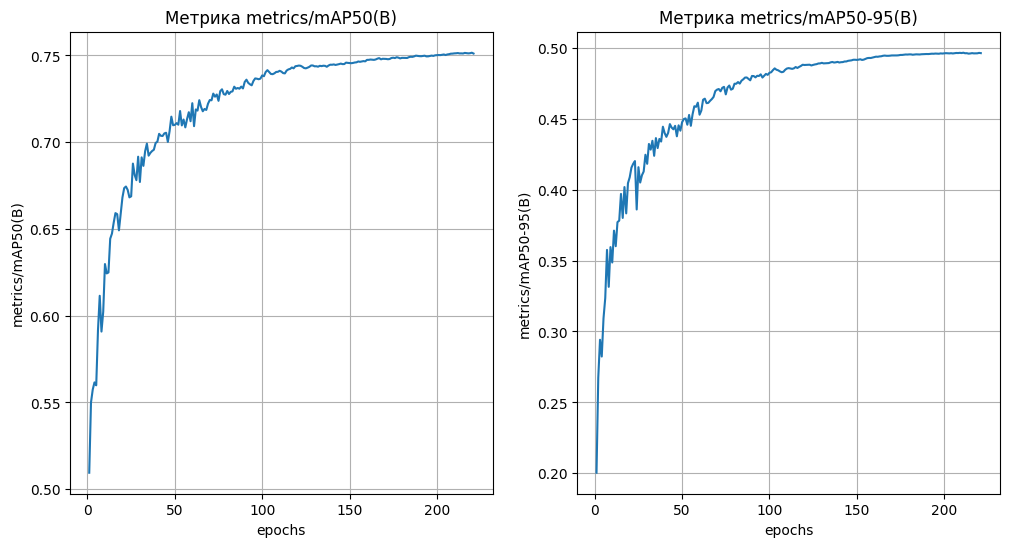

In [ ]:
trainer.plot_metrics(metrics=['metrics/mAP50(B)', 'metrics/mAP50-95(B)'])

Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 22.09.6 MB/s, size: 139.9 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.16it/s]


                   all        515      14064      0.844      0.715      0.795       0.55
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\val163
Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 16.54.5 MB/s, size: 122.0 KB)


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.56it/s]


                   all        515      14064      0.803      0.672      0.751      0.497
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\val164


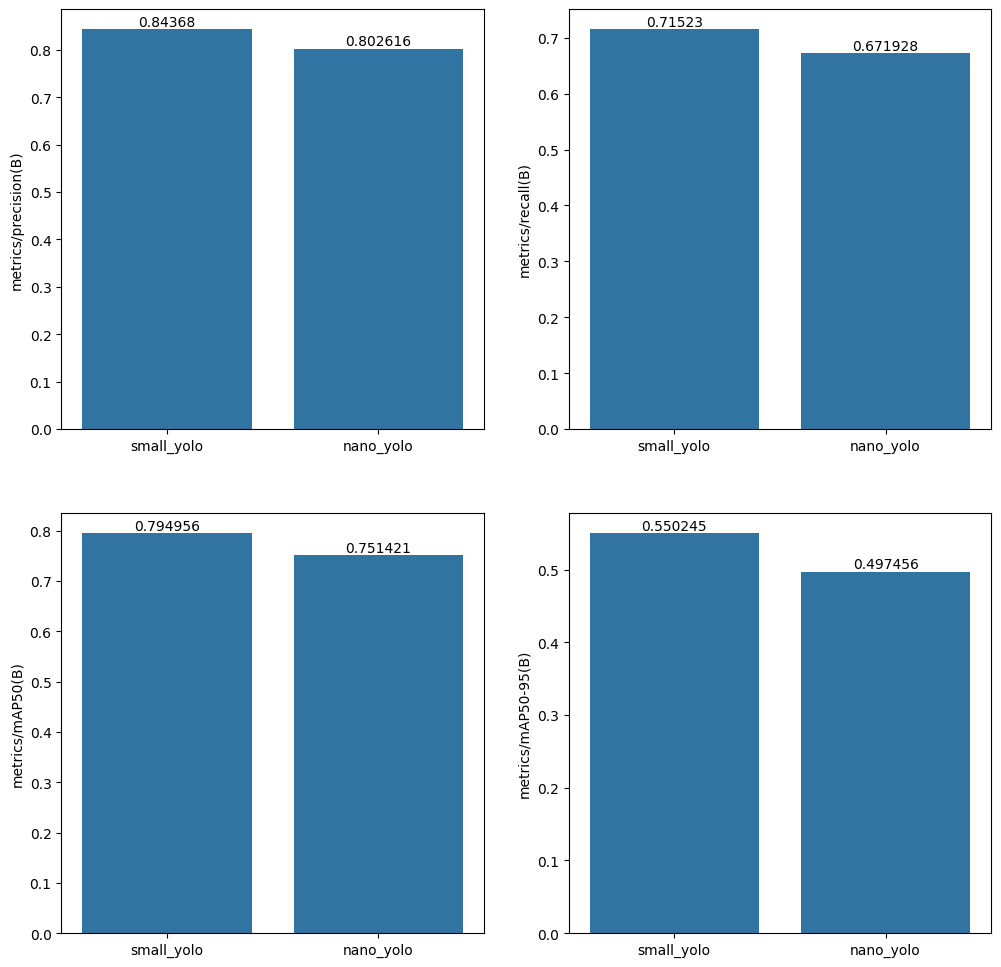

In [4]:
#validate model
from Pipeline import create_metrics, plot_validate


validator_cfg = get_yaml_config(YAML_CONFIG, 'validate')

validator = create_metrics(**validator_cfg)
plot_validate(validator([SMALL_YOLO, NANO_YOLO]))

Setup complete  (12 CPUs, 31.9 GB RAM, 243.1/265.6 GB disk)

Benchmarks complete for .\projects\nano_yolo\train\weights\best.pt on train.yaml at imgsz=640 (26.62s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
    Format Status  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)    FPS
0  PyTorch               5.2               0.4975                   43.53  22.97



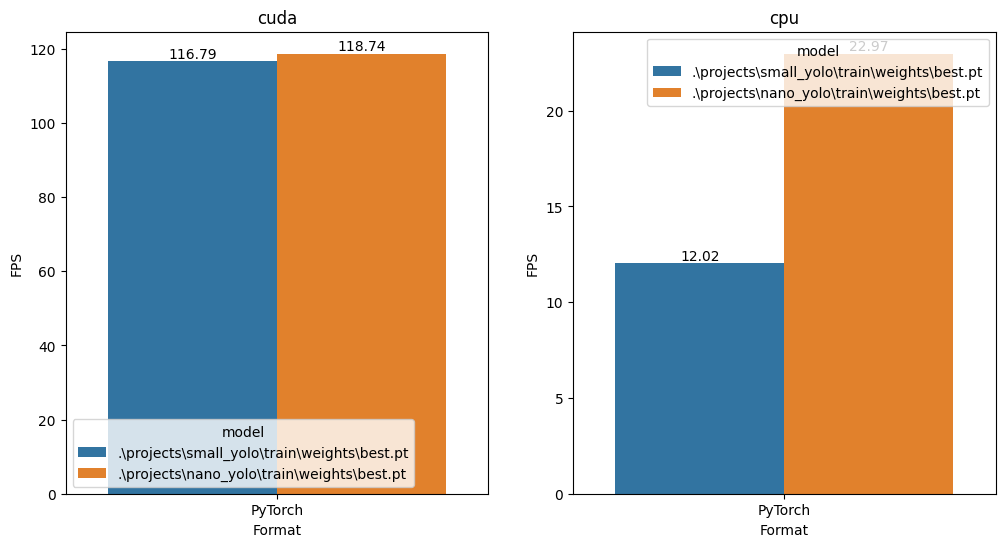

In [ ]:
#benchmark models
from Pipeline import benchmark_report, plot_benchmark

bench_cfg = get_yaml_config(YAML_CONFIG, 'benchmark')

df = benchmark_report(**bench_cfg, projects=[SMALL_YOLO, NANO_YOLO], devices=['cuda', 'cpu'])
plot_benchmark(df)

Setup complete  (12 CPUs, 31.9 GB RAM, 243.5/265.6 GB disk)

Benchmarks complete for .\projects\nano_yolo\train\weights\best.pt on train.yaml at imgsz=640 (65.91s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
  Format Status  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)    FPS
0   ONNX              10.1               0.4978                   48.17  20.76



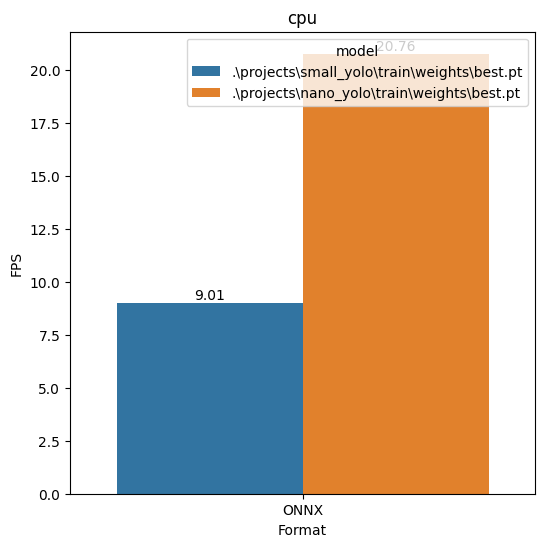

In [ ]:
#benchmark fps for models in onnx format on CPU
df = benchmark_report(**bench_cfg, projects=[SMALL_YOLO, NANO_YOLO], devices=['cpu'], engines=['onnx'])
plot_benchmark(df)


image 1/1 d:\projects\visdrone\dataset\VisDrone2019-DET-val\images\0000244_04000_d_0000009.jpg: 384x640 64 items, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict10
runs\detect\predict10/0000244_04000_d_0000009.jpg


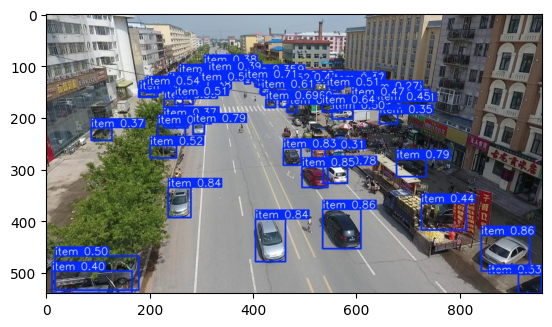

In [ ]:
#visualize model predictions
from ultralytics import YOLO
import random
import os
import matplotlib.pyplot as plt

model_path = f'./projects/{NANO_YOLO}/train/weights/best.pt'
images_path = './dataset/VisDrone2019-DET-val/images'

model = YOLO(model_path)   #загружаем самую лучшую модель
model = model.eval()

image = random.choice([i for i in os.listdir(images_path) if i.endswith('jpg')])
results = model(f'{images_path}/{image}', save=True) 

dir = results[0].save_dir
image_path = os.listdir(dir)[0]

path = f"{dir}/{image_path}"

image = plt.imread(path)
imgplot = plt.imshow(image)

plt.show()


In [ ]:
#export model to ONNX format
from Pipeline.export import create_export

export_cfg = get_yaml_config(YAML_CONFIG, 'export')

exporter = create_export(**export_cfg)

#export onnx model with specific name
exporter(SMALL_YOLO, output_folder = 'onnx_models', export_model_name = '16b640p_2704')
exporter(NANO_YOLO, output_folder = 'onnx_models', export_model_name = '16b640p_2704')


YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
Ultralytics 8.3.111  Python-3.11.0 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)

PyTorch: starting from 'projects\small_yolo\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
Retry 1/2 failed: Command 'pip install --no-cache-dir "onnxruntime-gpu" ' returned non-zero exit status 1.
Retry 2/2 failed: Command 'pip install --no-cache-dir "onnxruntime-gpu" ' returned non-zero exit status 1.
requirements:  Command 'pip install --no-cache-dir "onnxruntime-gpu" ' returned non-zero exit status 1.

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  35.3s, saved as 'projects\small_yolo\train\weights\best.onnx' (36.1 MB)

Export complete (35.4s)
Results saved to D:\projects\visdrone\projects\sm

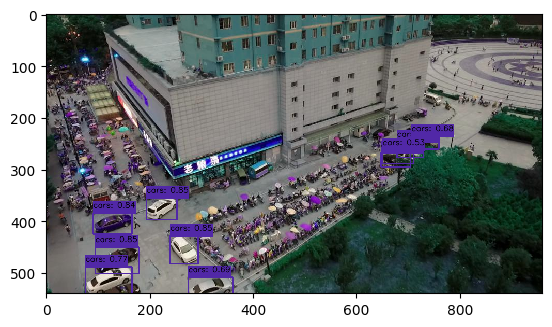

In [ ]:
#test onnx model

from Pipeline import YoloONNX
import cv2
from matplotlib import pyplot as plt

model = './onnx_models/nano_yolo_16b640p_2704.onnx'


model = YoloONNX(model, device='cpu')
frame = cv2.imread('test.jpg')

results = model([frame])

plt.imshow(results[0], interpolation='nearest')
plt.show()
